## Step1 라이브러리 불러오기, 데이터 읽기

## Step2 데이터 전처리

## Step3 모델 학습

<b>사용 인공지능 모델</b>
- 인공지능 모델은 ExplainableBoostingClassifier를 사용합니다.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from interpret.glassbox import ExplainableBoostingClassifier

ebm = ExplainableBoostingClassifier(interactions=False, n_jobs=1, random_state=42)
ebm.fit(X_train, y_train_encoded)

y_pred = ebm.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
#print(type(y_test_encoded[0]), type(y_pred[0]))
y_pred_lbl = encoder.inverse_transform(y_pred)
y_test_lbl = encoder.inverse_transform(y_test_encoded)


report = classification_report(y_test_lbl, y_pred_lbl, target_names=encoder.classes_, digits=2, zero_division=0)

print('='*20, 'accuracy 결과입니다.', '='*20)
print(accuracy)
print('='*20, 'classification_report 결과입니다.', '='*20)
print(report)

c:\Users\최주리\AppData\Local\Programs\Python\Python313\Lib\site-packages\interpret\glassbox\_ebm\_ebm.py:869: UserWarning: Missing values detected. Our visualizations do not currently display missing values. To retain the glassbox nature of the model you need to either set the missing values to an extreme value like -1000 that will be visible on the graphs, or manually examine the missing value score in ebm.term_scores_[term_index][0]
  warn(


==================== accuracy 결과입니다. ====================
0.9413793103448276
==================== classification_report 결과입니다. ====================
              precision    recall  f1-score   support

      dealer       0.94      0.97      0.95       320
      healer       0.95      0.91      0.93       137
      tanker       0.95      0.91      0.93       123

    accuracy                           0.94       580
   macro avg       0.94      0.93      0.94       580
weighted avg       0.94      0.94      0.94       580



<img src="./참고이미지/Q10/Q10_1.png" width="45%">

<b>코드 Cell</b>
- features와 target으로 데이터를 분리합니다.
- features와 target에 대한 정보를 확인합니다.

In [ ]:
features = tmp_df[['playtime', 'playcount', 'level', 'paycount', 'payamount', 'mainjoblevel']]
target = tmp_df['mainjob']

print('='*20, 'features 정보입니다.', '='*20)
display(features.shape)
display(features.head())

print('='*20, 'target 정보입니다.', '='*20)
display(target.shape)
display(target.head())

==================== features 정보입니다. ====================


(2899, 6)

,playtime,playcount,level,paycount,payamount,mainjoblevel
0,61,1.0,15,1,60300,60
1,14,1.0,15,1,100,60
2,16,1.0,15,1,151,60
3,1300,3.0,15,1,1000,60
4,41,3.0,15,1,16000,60


==================== target 정보입니다. ====================


(2899,)

0    dealer
1    dealer
2    tanker
3    tanker
4    tanker
Name: mainjob, dtype: object

<img src="./참고이미지/Q9/Q9_2.png" width="35%">

<b>코드 Cell</b>
- features와 target 데이터를 train_test_split을 통해 분리합니다.
- test_size = 0.2로 설정하고 random_state = 42로 설정합니다.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42, shuffle=True)

print('='*20, '분할 이후 train 데이터 크기입니다.', '='*20)
display(X_train.shape)
display(y_train.shape)

print('='*20, '분할 이후 test 데이터 크기입니다.', '='*20)
display(X_test.shape)
display(y_test.shape)

print('='*20, 'train 데이터와 test 데이터 비율 계산 결과입니다.', '='*20)
train_ratio = len(X_train) / (len(X_train) + len(X_test))
test_ratio = len(X_test) / (len(X_train) + len(X_test))
print(f"{train_ratio}")  # 퍼센트로, 소수점 둘째자리까지
print(f"{test_ratio}")

==================== 분할 이후 train 데이터 크기입니다. ====================


(2319, 6)

(2319,)

==================== 분할 이후 test 데이터 크기입니다. ====================


(580, 6)

(580,)

==================== train 데이터와 test 데이터 비율 계산 결과입니다. ====================
0.7999310106933425
0.20006898930665748


<img src="./참고이미지/Q9/Q9_3.png" width="100%">

<b>코드 Cell</b>
- target 데이터에 대한 LabelEncoding 과정을 수행합니다.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded  = encoder.transform(y_test)
#encoded

<b>코드 Cell</b>
- hist 시각화를 통해 Label Encoding 전후의 모습을 확인합니다.
- hist 시각화 과정에서 별도의 옵션을 설정한 것은 없습니다.`

==================== LabelEncoding 이전의 분포입니다. ====================


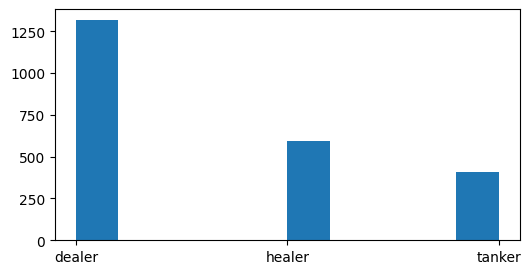

==================== LabelEncoding 이후의 분포입니다. ====================


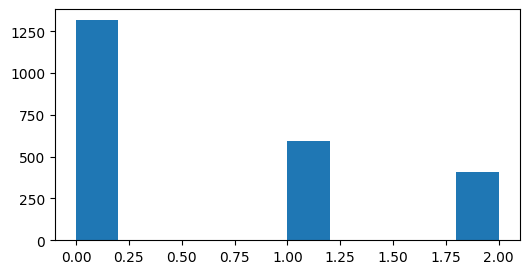

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print('='*20, 'LabelEncoding 이전의 분포입니다.', '='*20)
le_before = y_train.value_counts()
plt.figure(figsize=(6,3))
for i, (label, val) in enumerate(le_before.items()):
    w = 0.2 if i < len(le_before)-1 else -0.2   # 마지막만 오른쪽 정렬
    plt.bar(label, val, width=w, align='edge', color = "#1f77b4")
plt.yticks(np.arange(0, max(le_before.values), 250))
plt.show()

print('='*20, 'LabelEncoding 이후의 분포입니다.', '='*20)
le_after = pd.Series(y_train_encoded).value_counts()
#print(le_after)
plt.figure(figsize=(6,3))
for i, (label, val) in enumerate(le_after.items()):
    w = 0.2 if i < len(le_after)-1 else -0.2   # 마지막만 오른쪽 정렬
    plt.bar(label, val, width=w, align='edge', color = "#1f77b4")
plt.yticks(np.arange(0, max(le_after.values), 250))
plt.xticks(np.arange(0, max(le_after.index)+0.25, 0.25))
plt.show()


<img src="./참고이미지/Q9/Q9_4.png" width="40%">

- 인공지능 분류 모델을 설계합니다.
- ['playtime', 'playcount', 'level', 'paycount', 'payamount', 'mainjoblevel']` 정보를 feature로 사용합니다.
- mainjob을 target으로 설정합니다.

In [20]:
# 데이터 읽기용 코드셀입니다.

import pandas as pd
print('='*20, 'game.xlsx 데이터 정보입니다.', '='*20)
tmp_df = pd.read_excel('../data_과제/game.xlsx', sheet_name='Sheet1')
display(tmp_df.shape)
display(tmp_df.columns)
display(tmp_df.head())

==================== game.xlsx 데이터 정보입니다. ====================


(2899, 9)

Index(['user_id', 'date', 'playtime', 'playcount', 'level', 'mainjob',
       'paycount', 'payamount', 'mainjoblevel'],
      dtype='object')

,user_id,date,playtime,playcount,level,mainjob,paycount,payamount,mainjoblevel
0,1001,2024-01-10,61,1.0,15,dealer,1,60300,60
1,1001,2024-01-11,14,1.0,15,dealer,1,100,60
2,1001,2024-01-12,16,1.0,15,tanker,1,151,60
3,1001,2024-01-13,1300,3.0,15,tanker,1,1000,60
4,1001,2024-01-14,41,3.0,15,tanker,1,16000,60


<img src="./참고이미지/Q9/Q9_1.png" width="45%">